# Top 1000: TikTok Influencers

#### About the Dataset
Tiktok, known as Douyin in China, is a short-form video hosting service owned by the Chinese company ByteDance. It hosts a variety of user-submitted videos containing content such as pranks, stunts, tricks, jokes, and dance with each video having a duration between 15 seconds to 10 minutes. TikTok is an international version of Douyin, which was originally released in 2016. TikTok was launched in 2017 for iOS and Android in most markets outside of mainland China; however, in August 2018, it became available worldwide after its merge with Chineese social media service, Musical.ly.

TikTok and Douyin have a similar user interface but no access to each other's content. Their servers are each based in the market where the respective app is available. The two products are almost the same, but the features are not identical. Douyin includes an in-video search feature that can search by people's faces for more videos of them among other features such as buying, booking hotels and making geo-tagged reviews. Since its launch in 2016, TikTok and Douyin rapidly gained popularity in virtually all parts of the world. TikTok surpassed 2 billion mobile downloads worldwide in October 2020.

In this dataset you will find the details about top 1000 tiktokers all over the world. 

#### Purpose of Analysis

Find the top TikTok influencers to work with by the number of average views per video, average likes, comments, and shares.

## Imports and Dataset Load

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy.stats.mstats import winsorize
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.ticker as ticker
from matplotlib.axis import Axis  
from tabulate import tabulate
import sys
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


%matplotlib inline

In [2]:
# Create attribute (sys.warnoptions) to indicate whether or not warnings should be disabled
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
# Load the data
tiktok_df = pd.read_csv('/Users/tiffanivick/Workspace/python/TikTok-DataAnalysis/tiktok_top_1000.csv')

In [4]:
# View the data
tiktok_df.head() 

,Country,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
0,All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
1,All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
2,All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
3,All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
4,All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971



A few things I noticed in the table above:

- Column headers are not very clean - so the column headers will be transformed to snake_case

- *Scraped* column isn't meaningful - so it will be dropped from the dataset.

- First 5 rows in the *Country* column contain the string: 'All' - a quick check for unique items using Numpy's function: *numpy.unique()*.
    - If no unique values, column will be dropped from dataset, as it wouldn't be meaningful in the analysis.

In [5]:
variable_descriptions = {
  'Variable': ['Country', 'Rank (target variable)', 'Account', 'Title', 'Link', 'Subscribers', 'Views', 'Likes', 'Comments', 'Shares'],
  'Definition': ['country that the user lives in', 'overall rank based on followers and popularity', 'account name', 'handle used in TikTok', 'URL to user account', 'number of subscribers/followers', 
                 'average number of views per video', 'average number of likes per video', 'average number of comments per video', 'average number of shares per video']
}


# Table of definitions
print(tabulate(variable_descriptions, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════╤════════════════════════════════════════════════╕
│ Variable               │ Definition                                     │
╞════════════════════════╪════════════════════════════════════════════════╡
│ Country                │ country that the user lives in                 │
├────────────────────────┼────────────────────────────────────────────────┤
│ Rank (target variable) │ overall rank based on followers and popularity │
├────────────────────────┼────────────────────────────────────────────────┤
│ Account                │ account name                                   │
├────────────────────────┼────────────────────────────────────────────────┤
│ Title                  │ handle used in TikTok                          │
├────────────────────────┼────────────────────────────────────────────────┤
│ Link                   │ URL to user account                            │
├────────────────────────┼────────────────────────────────────────────────┤
│ Subscriber

## Data Cleaning

In [6]:
# Check for unique values
tiktok_df['Country'].unique()

array(['All'], dtype=object)

No unique values in the *Country* column so it will be dropped from the dataset.

In [7]:
drop_cols = ['Scraped', 'Country']

# Drop columns in drop_cols from dataset
for col in drop_cols:
  tiktok_df.drop(columns=col, inplace=True)

In [8]:
# Clean column titles
orig_cols = list(tiktok_df.columns)
new_cols = []
for col in orig_cols:
  new_cols.append(col.strip().replace(' ', ' ').replace(' ', '_').lower().replace('.', ''))
tiktok_df.columns = new_cols

In [9]:
# Rename column titles
tiktok_df.rename(columns={'Subscribers count':'subscribers_count '}, inplace=True)
tiktok_df.rename(columns={'Views avg.':'views_avg '}, inplace=True)
tiktok_df.rename(columns={'Likes avg.':'likes_avg '}, inplace=True)
tiktok_df.rename(columns={'Comments avg.':'comments_avg '}, inplace=True)
tiktok_df.rename(columns={'Shares avg.':'shares_avg '}, inplace=True) 

In [10]:
tiktok_df.head()

,rank,account,title,link,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
0,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0
1,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0
2,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0
3,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0
4,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0


In [11]:
# Check for duplicate values
tiktok_df.duplicated().sum()

0

In [12]:
# Count of unique instances
tiktok_df.nunique()

rank                 1000
account               999
title                 992
link                  999
subscribers_count     410
views_avg             136
likes_avg             874
comments_avg          225
shares_avg            356
dtype: int64

### Missing Values Detection

In [13]:
# Summary of data
tiktok_df.info()

# Describe the data
tiktok_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1000 non-null   int64  
 1   account            1000 non-null   object 
 2   title              998 non-null    object 
 3   link               1000 non-null   object 
 4   subscribers_count  1000 non-null   float64
 5   views_avg          1000 non-null   float64
 6   likes_avg          1000 non-null   float64
 7   comments_avg       1000 non-null   float64
 8   shares_avg         1000 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 70.4+ KB


,rank,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,500.500000,7.049170e+06,3.700866e+06,4.537407e+05,4559.051000,1.068108e+04
std,288.819436,1.087267e+07,4.697164e+06,6.964760e+05,7766.145534,1.677724e+05
min,1.000000,4.300000e+03,5.853000e+05,3.100000e+04,0.000000,2.120000e+02
25%,250.750000,1.400000e+06,1.800000e+06,2.304500e+05,1600.000000,1.200000e+03
50%,500.500000,3.700000e+06,2.600000e+06,3.202000e+05,2800.000000,2.400000e+03
75%,750.250000,8.625000e+06,4.000000e+06,4.783750e+05,4900.000000,5.400000e+03
max,1000.000000,1.354000e+08,9.500000e+07,1.810000e+07,151000.000000,5.300000e+06


7,049,170	  3,700,866	  453,740	  4,559	  10,681

In [14]:
# Find null values
tiktok_df.isnull().sum()

rank                 0
account              0
title                2
link                 0
subscribers_count    0
views_avg            0
likes_avg            0
comments_avg         0
shares_avg           0
dtype: int64

There are 2 null values present in the Title column.<br>
Which rows in the title column contain the null values?

In [15]:
# View null rows
tiktok_df[tiktok_df['title'].isnull()]

,rank,account,title,link,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
834,835,iloveyourmomscatt,NaN,https://www.tiktok.com/@iloveyourmomscatt,8200.0,1300000.0,159300.0,4900.0,3300.0
987,988,carloandsarah,NaN,https://www.tiktok.com/@carloandsarah,3000000.0,2600000.0,177300.0,662.0,2100.0


As the title in the titles column has multiple instances of accounts and titles naming being similar, so I will replace the nulls in the title column with their account name.

In [16]:
# Replace nulls
tiktok_df['title'].fillna(value=tiktok_df['account'], inplace=True)

The easiest way to see if the nulls were successfully replaced is by using the .info() method from *pandas* library.

In [17]:
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1000 non-null   int64  
 1   account            1000 non-null   object 
 2   title              1000 non-null   object 
 3   link               1000 non-null   object 
 4   subscribers_count  1000 non-null   float64
 5   views_avg          1000 non-null   float64
 6   likes_avg          1000 non-null   float64
 7   comments_avg       1000 non-null   float64
 8   shares_avg         1000 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 70.4+ KB


All null values have successfully been replaced.
Next step is to detect outliers and then deal with the outliers with 1 of 3 methods:

    Drop outliers

    Limit/Winsorize outliers

    Transform the data using log/inverse/square root/etc.

## Outlier Detection

In [18]:
# Create df list slice 
cont_vars = list(tiktok_df)[4:]

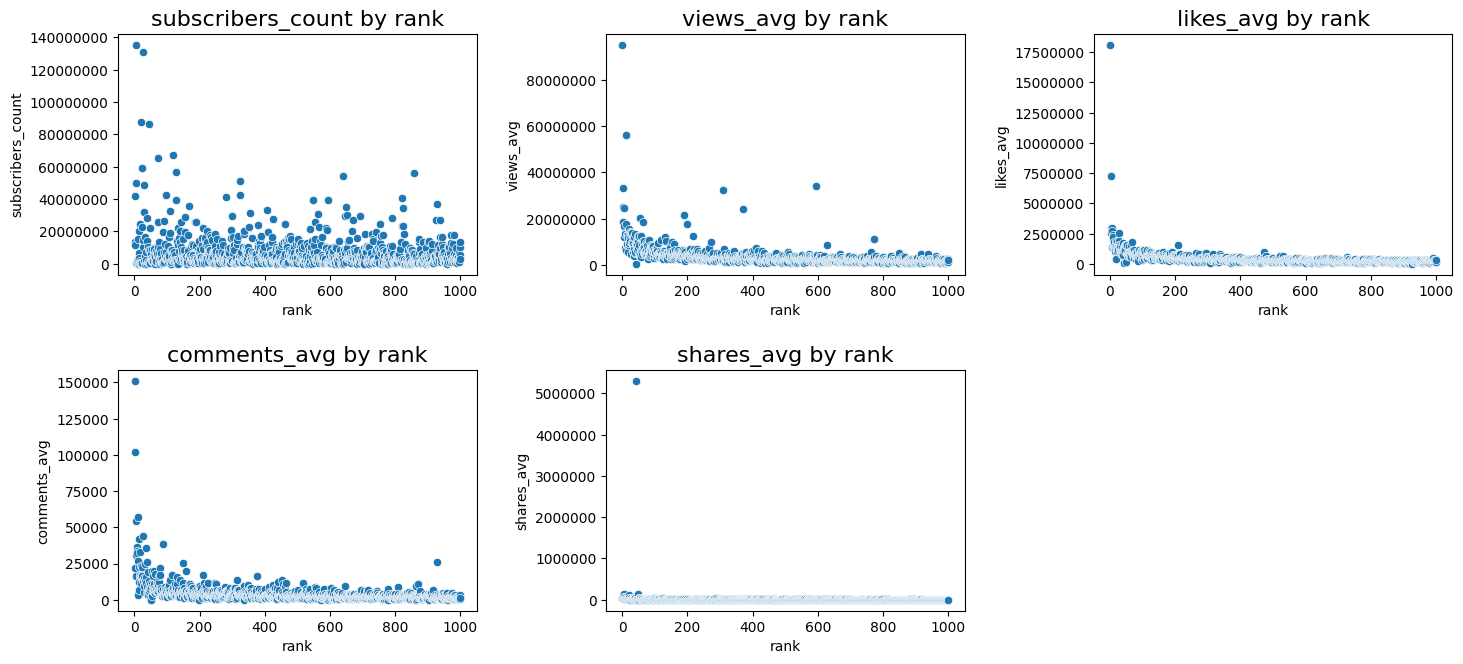

In [19]:
# # Create boxplots 
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(['subscribers_count', 'views_avg', 'likes_avg', 'comments_avg', 'shares_avg'], start=1):
#   ax= plt.subplot(2, 3, i)
#   g = plt.boxplot(data=tiktok_df, x=col)
#   ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#   plt.title(f'{col} by rank', fontsize=15)
# plt.tight_layout()
# plt.show()



# Create scatterplots 
plt.figure(figsize=(15, 7))  # orig = (15, 10)
for i, col in enumerate(['subscribers_count', 'views_avg', 'likes_avg', 'comments_avg', 'shares_avg'], start=1):
  plt.subplot(2, 3, i)
  ax = sns.scatterplot(x='rank', y=col, data=tiktok_df)
  plt.title(f'{col} by rank', fontsize=16)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.tight_layout(pad=2.0)
plt.show()

Outliers

    There's a noticeable amount of outliers in each plot, particularly in the rank by subscribers_count plot where there are a number of points that fall away from the cluster. Since there seems to be a unique amount of outliers for each variable, the best route is probably winsorizing (limiting) values for each variable on it's own until no outliers remain.


Winsorization

    Winsorization directly intervenes with the process of outlier detection. The data points above or below a threshhold are treated, an no independent detection method is needed.

In [20]:
# Find the upper and lower bounds
def col_bounds(data, col):
  q3, q1 = np.percentile(data[col], [75, 25])
  iqr = q3 - q1
  lower_bound = int(q1 - (iqr*1.5))
  upper_bound = int(q3 + (iqr*1.5))
  return lower_bound, upper_bound

# Retrieve each column's lower and upper bounds
for col in cont_vars:
  lower_bound, upper_bound = col_bounds(tiktok_df, col)
  lower_bound = np.round_(lower_bound, decimals=-2)
  print('--------', col, '--------')
  print('Lower bound: ', lower_bound)
  print('Upper bound: ', upper_bound)

-------- subscribers_count --------
Lower bound:  -9437500
Upper bound:  19462500
-------- views_avg --------
Lower bound:  -1500000
Upper bound:  7300000
-------- likes_avg --------
Lower bound:  -141400
Upper bound:  850262
-------- comments_avg --------
Lower bound:  -3400
Upper bound:  9850
-------- shares_avg --------
Lower bound:  -5100
Upper bound:  11700


Since subscribers, views, likes, comments, and shares below zero are not meaningful, the data should only be winsorized on its right-tail.

#### ------- Upper Bounds -------
<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Upper Bound</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>subscribers_count</td>
      <td>19,462,500</td>
    </tr>
    <tr>
      <td>views_avg</td>
      <td>7,300,000</td>
    </tr>
    <tr>
      <td>likes_avg</td>
      <td>850,262</td>
    </tr>
    <tr>
      <td>comments_avg</td>
      <td>9,850</td>
    </tr>
    <tr>
      <td>shares_avg</td>
      <td>11,700</td>
    </tr>
  </tbody>
</table>

In [21]:
# Explore quartiles at the upper end of fence
for col in cont_vars:
  print('--------', col, '--------------')
  print('90% percentile: ', np.round(np.percentile(tiktok_df[col], 90), decimals=1))
  print('90.2% percentile: ', np.round(np.percentile(tiktok_df[col], 90.2), decimals=1))
  print('95% percentile: ', np.round(np.percentile(tiktok_df[col], 95), decimals=1))
  print('97.5% percentile: ', np.round(np.percentile(tiktok_df[col], 97.5), decimals=1))
  print('99.9% percentile: ', np.round(np.percentile(tiktok_df[col], 99.9), decimals=1))

-------- subscribers_count --------------
90% percentile:  15800000.0
90.2% percentile:  15909800.0
95% percentile:  23920000.0
97.5% percentile:  33530000.0
99.9% percentile:  131104300.0
-------- views_avg --------------
90% percentile:  6110000.0
90.2% percentile:  6200000.0
95% percentile:  9310000.0
97.5% percentile:  12705000.0
99.9% percentile:  55939100.0
-------- likes_avg --------------
90% percentile:  813140.0
90.2% percentile:  815766.4
95% percentile:  1100000.0
97.5% percentile:  1600000.0
99.9% percentile:  7310800.0
-------- comments_avg --------------
90% percentile:  8300.0
90.2% percentile:  8309.8
95% percentile:  13010.0
97.5% percentile:  19612.5
99.9% percentile:  101949.1
-------- shares_avg --------------
90% percentile:  11420.0
90.2% percentile:  11709.8
95% percentile:  18105.0
97.5% percentile:  31117.5
99.9% percentile:  143561.6


Upper Bound Measure Range
- The value at <b>90.2%</b> (15,909,800) and <b>95%</b> (23,920,000) are closest to the upper bound of <b>subscriber_count</b><br>


- The value at <b>90.2%</b> (6,200,000) and <b>95%</b> (9,310,000) are closest to the upper bound of <b>views</b><br>


- The value at <b>90.2%</b> (815,766) and <b>95%</b> (1,100,000) are closest to the upper bounde of <b>likes</b><br>


- The value at <b>90.2%</b> (8,309) and <b>95%</b> (,3010) are closest to the upper bound of <b>comments</b><br>


- The value at <b>90%</b> (11,420) and <b>90.2%</b> (11,709) are closest to the upper bound of <b>shares</b><br>

##### All values appear to be closest to the 90.2 percentile.

In [22]:
# Create an empty dictionary to hold winsorized data
tiktok_wins_dict = {}

# Test winsorized against original 
def test_wins_cols(col, upper_limit=0, show_plot=True):
  tiktok_wins_data = winsorize(tiktok_df[col], limits=(upper_limit))
  tiktok_wins_dict[col] = tiktok_wins_data
  
  if show_plot == True:
    plt.figure(figsize=(15, 5))
    
    ax1 = plt.subplot(121)
    plt.boxplot(tiktok_df[col])
    plt.title(f'Original {col}', fontsize=16)
    plt.xlabel(col)
    
    ax2 = plt.subplot(122)
    plt.boxplot(tiktok_wins_data)
    plt.title(f'wins= (0, {upper_limit}) {col}', fontsize=16)
    
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
    plt.xlabel(col)

Switch show_plot=True to see how the plots differ for each column.

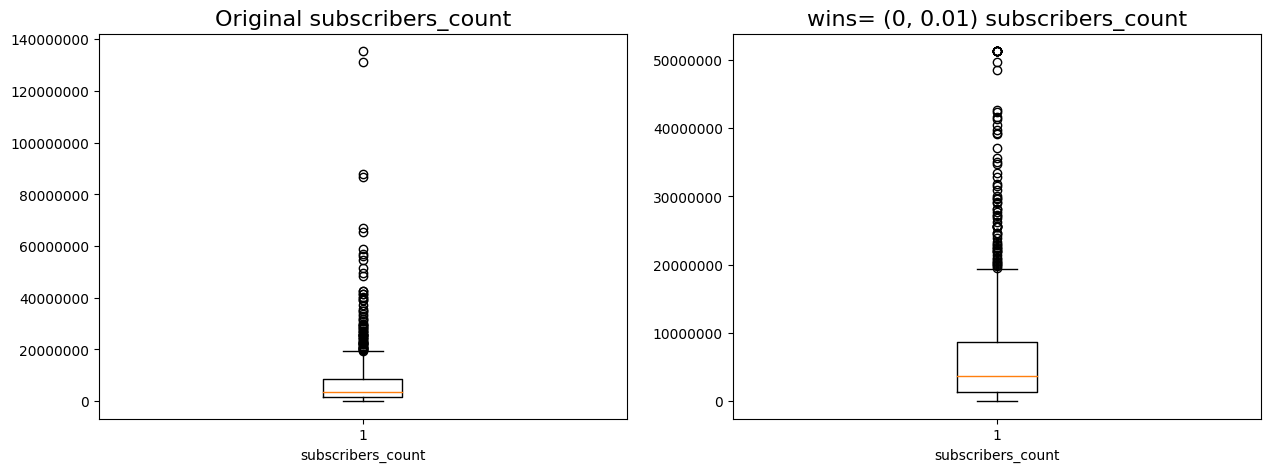

In [23]:
# Plot original and winsorized plots for comparison
test_wins_cols(cont_vars[0], upper_limit=0.01, show_plot=True)  # 93%    
test_wins_cols(cont_vars[1], upper_limit=0.01, show_plot=False) # 92%      
test_wins_cols(cont_vars[2], upper_limit=0.01, show_plot=False)  # 90%       
test_wins_cols(cont_vars[3], upper_limit=0.01, show_plot=False) # 92%   
test_wins_cols(cont_vars[4], upper_limit=0.01, show_plot=False)  # 90% 


# # Plot original and winsorized plots for comparison
# test_wins_cols(cont_vars[0], upper_limit=0.07, show_plot=True)  # 93%    
# test_wins_cols(cont_vars[1], upper_limit=0.08, show_plot=False) # 92%      
# test_wins_cols(cont_vars[2], upper_limit=0.1, show_plot=False)  # 90%       
# test_wins_cols(cont_vars[3], upper_limit=0.08, show_plot=False) # 92%   
# test_wins_cols(cont_vars[4], upper_limit=0.1, show_plot=False)  # 90%      

I tested various limits for each individual variable until no outliers were remaining. I looked for the limit at the exact point so that I could retain as much data as possible.

In [24]:
print('The limit that each variable will be winsorized on are stated in the following table:')
print()
table = [['Subscribers', 0.07], ['Views', 0.08], ['Likes', 0.1], ['Comments', 0.08], ['Shares', 0.1]]
print(tabulate(table, headers=['Variable', 'Wins Limit']))

The limit that each variable will be winsorized on are stated in the following table:

Variable       Wins Limit
-----------  ------------
Subscribers          0.07
Views                0.08
Likes                0.1
Comments             0.08
Shares               0.1


In [25]:
print('The limit that each variable will be winsorized on are stated in the following table:')
print()
table = [['Subscribers', 0.07], ['Views', 0.08], ['Likes', 0.01], ['Comments', 0.08], ['Shares', 0.1]]
print(tabulate(table, headers=['Variable', 'Wins Limit']))

The limit that each variable will be winsorized on are stated in the following table:

Variable       Wins Limit
-----------  ------------
Subscribers          0.07
Views                0.08
Likes                0.01
Comments             0.08
Shares               0.1


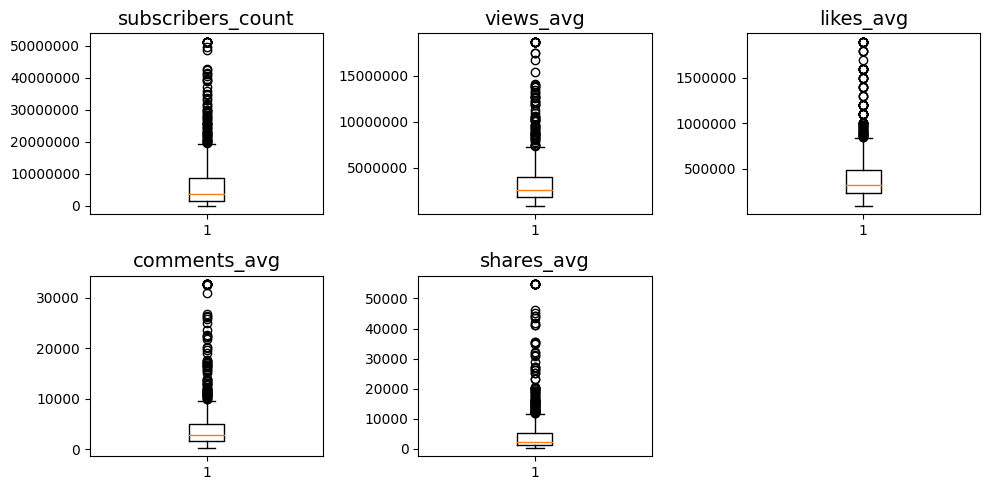

In [26]:
# Subplots (boxplot) of each numerical variable
plt.figure(figsize=(10, 5))
for i, col in enumerate(cont_vars, 1):
  ax = plt.subplot(2, 3, i)
  plt.boxplot(tiktok_wins_dict[col])
  plt.title(col, fontsize=14)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.show()

Now that the outliers have been delt with, the data cleaning section is complete.

## Data Exploration

Before diving into the data exploration, a new dataframe with the winsorized data should be created.

In [27]:
# Create new dataframe for winsorized data
tiktok_wins_df = tiktok_df.iloc[:, 0:3]
for col in cont_vars:
  tiktok_wins_df[col] = tiktok_wins_dict[col]  

### Univariate Analysis

Next, a univariate analysis will follow which is looking at each variable on its own. This is generally done using a histogram for continuous data and barplots for categorical data and by getting descriptive stats using .describe().

In [28]:
# Descriptive Statistics
tiktok_wins_df.describe()

,rank,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,6.762207e+06,3.522590e+06,4.270795e+05,4292.847000,5135.696000
std,288.819436,8.723125e+06,2.942916e+06,3.316806e+05,4994.389018,8182.694848
min,1.000000,1.130000e+04,9.127000e+05,9.150000e+04,227.000000,307.000000
25%,250.750000,1.400000e+06,1.800000e+06,2.304500e+05,1600.000000,1200.000000
50%,500.500000,3.700000e+06,2.600000e+06,3.202000e+05,2800.000000,2400.000000
75%,750.250000,8.625000e+06,4.000000e+06,4.783750e+05,4900.000000,5400.000000
max,1000.000000,5.130000e+07,1.870000e+07,1.900000e+06,32700.000000,54800.000000


#### -- Original vs. Winsorized: Mean Comparison --
<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Original Mean</th>
      <th>Winsorized Mean</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>subscribers</td>
      <td>7,049,170</td>
      <td>5,596,730</td>
    </tr>
    <tr>
      <td>views</td>
      <td>3,700,866</td>
      <td>3,100,100</td>
    </tr>
    <tr>
      <td>likes</td>
      <td>453,740</td>
      <td>386,945</td>
    </tr>
    <tr>
      <td>comments</td>
      <td>4,559</td>
      <td>3,535</td>
    </tr>
    <tr>
      <td>shares</td>
      <td>10,681</td>
      <td>3,876</td>
    </tr>
  </tbody>
</table>

##### Visual Distributions

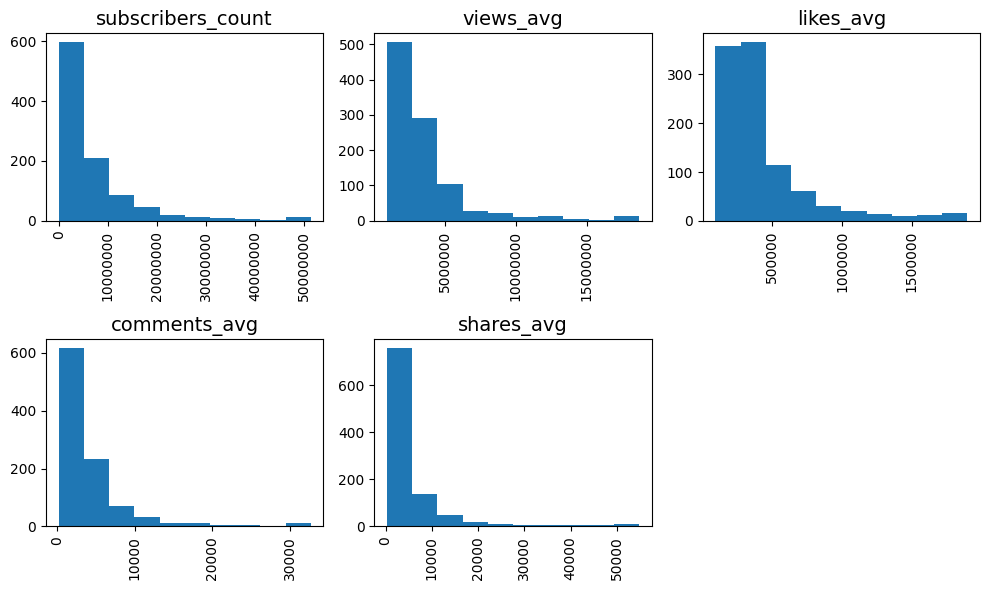

In [29]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(cont_vars, 1):
  ax = plt.subplot(2, 3, i)
  plt.hist(tiktok_wins_df[col])
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)
  plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

The winsorization seems to have had some effect on the variables, which can be seen from the spike in the last bin.

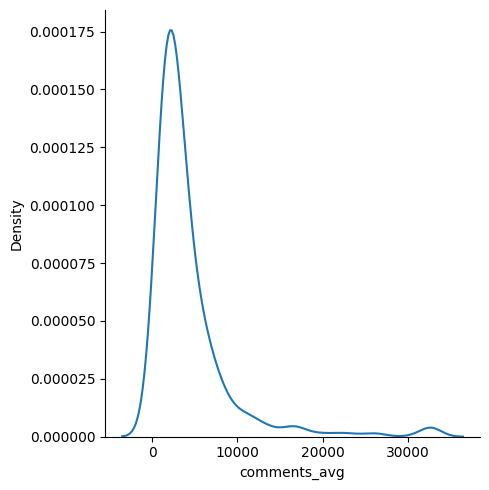

In [30]:
ax = sns.displot(tiktok_wins_df, x='comments_avg', kind='kde')
plt.show()

Majority of average comments are between 0 and 4000.

### Bivariate Analysis

There are a number of things that should be examined:

1. Continuous variables compared to rank (target variable) and to one another.
2. Categorical variables

In [31]:
# Correlation
tiktok_wins_df.corr(numeric_only=True)

,rank,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
rank,1.000000,-0.160902,-0.593753,-0.676433,-0.498478,-0.412689
subscribers_count,-0.160902,1.000000,0.272672,0.284083,0.136585,-0.072978
views_avg,-0.593753,0.272672,1.000000,0.698160,0.430718,0.305799
likes_avg,-0.676433,0.284083,0.698160,1.000000,0.574132,0.370653
comments_avg,-0.498478,0.136585,0.430718,0.574132,1.000000,0.503380
shares_avg,-0.412689,-0.072978,0.305799,0.370653,0.503380,1.000000


The closer to 1 the stronger the correlation between these variables.<br>
A minus sign means that these two variables are negatively correlated, i.e., as one decreased, the other increases and vice versa.

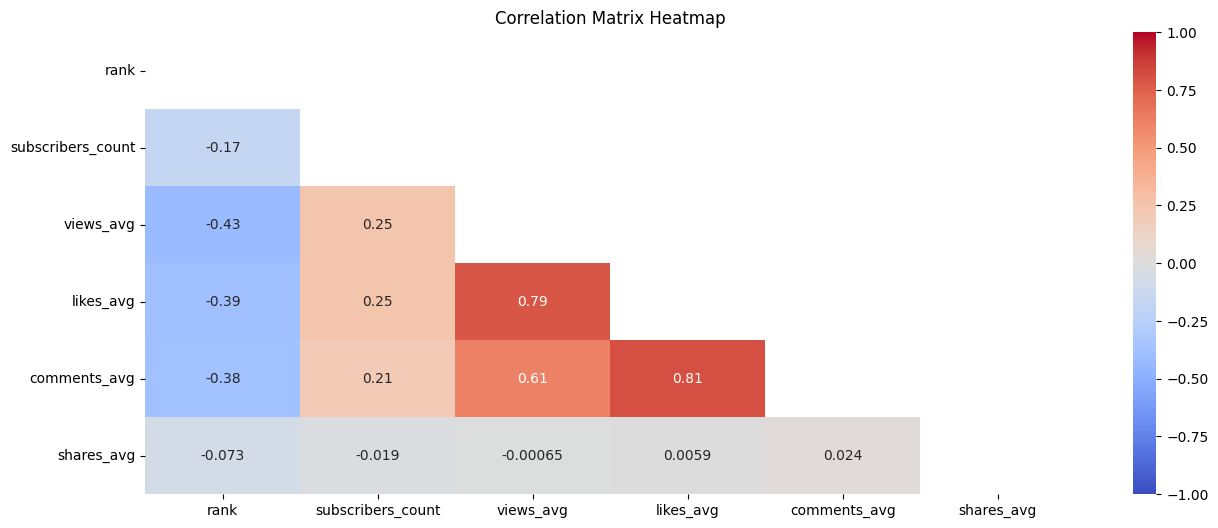

In [32]:
# Correlation heatmap
mask = np.triu(tiktok_df.corr(numeric_only=True))
plt.figure(figsize=(15, 6))
sns.heatmap(tiktok_df.corr(numeric_only=True), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(6, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Positively and negatively correlated variables:
- *rank* and *views* (negatively)
- *views* and *likes* (positively)
- *views* and *comments* (positively)
- *likes* and *comments* (positively)

*Likes* and *comments* have a moderate relationship with *rank* and so these two factors will be tested with rank as well. Both show a negative moderate correlation with rank.

<b>Note:</b> a strong positive corrlaion between variables is >= 0.4 and a negative correlation between variables is <= -0.4.

Next, the correlated variables will be tested to determine the effect they have onone variable on another.<br>
Before testing out the correlation between variables, it would be insightful to see the impact of each variable with respect to *rank*.

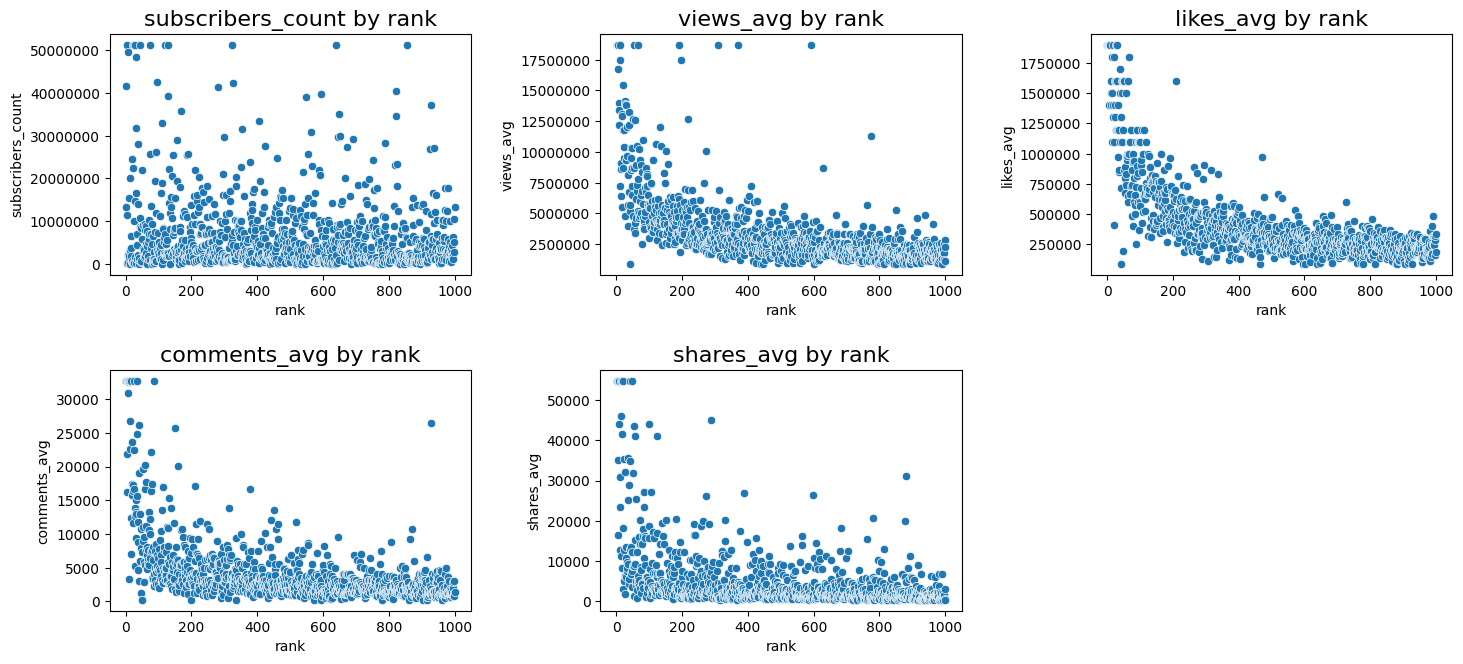

In [33]:
plt.figure(figsize=(15, 7)) 
for i, col in enumerate(['subscribers_count', 'views_avg', 'likes_avg', 'comments_avg', 'shares_avg'], start=1):
  plt.subplot(2, 3, i)
  ax = sns.scatterplot(data=tiktok_wins_df, x='rank', y=col)
  plt.title(f'{col} by rank', fontsize=16)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.tight_layout(pad=2.0)
plt.show()

Visually, in the subplots above, it's clear to see that *views* and *likes* have a greatest impact on *rank*. *Comments* looks to have somewhat of a relationship with *rank*. 

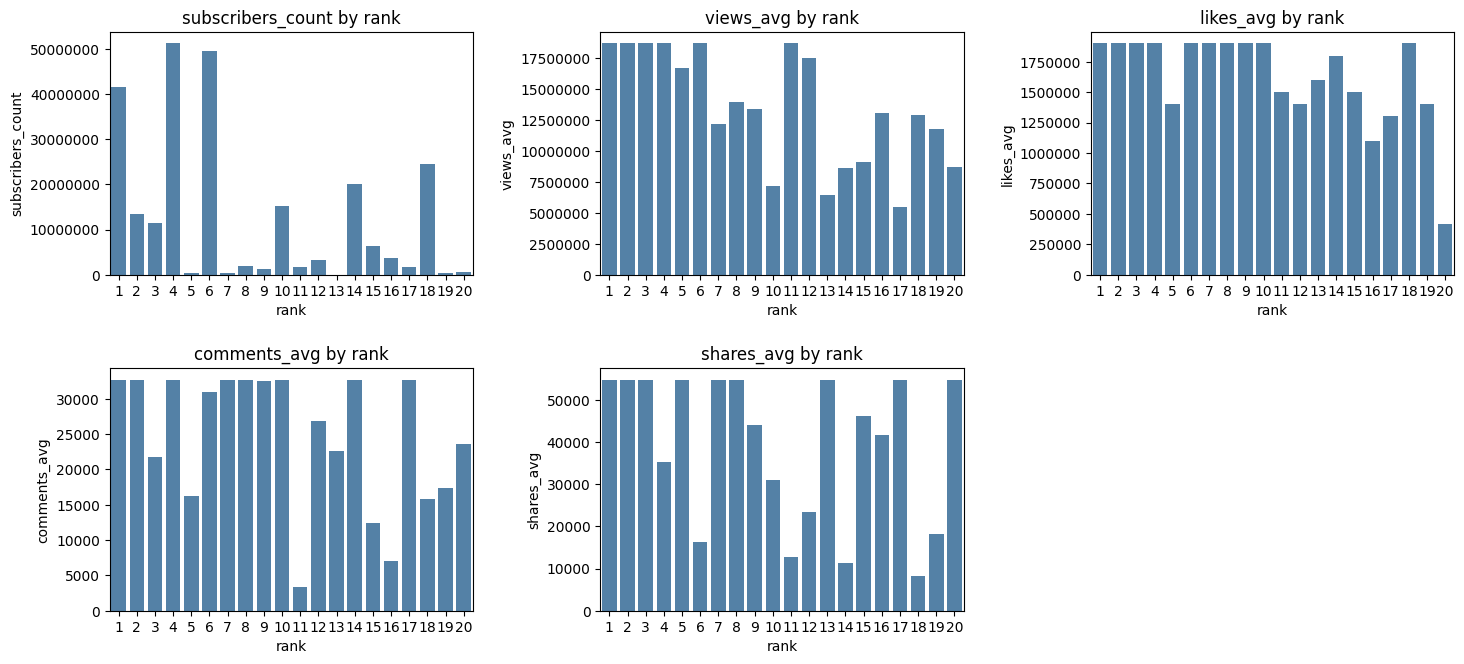

In [34]:
# Filter rank column
top_20_rank = tiktok_wins_df['rank'].head(20)

plt.figure(figsize=(15, 7)) 
for i, col in enumerate(['subscribers_count', 'views_avg', 'likes_avg', 'comments_avg', 'shares_avg'], start=1):
  plt.subplot(2, 3, i)
  ax = sns.barplot(data=tiktok_wins_df, x=top_20_rank, y=col, color='steelblue')
  plt.title(f'{col} by rank')
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.tight_layout(pad=2.0)
plt.show()

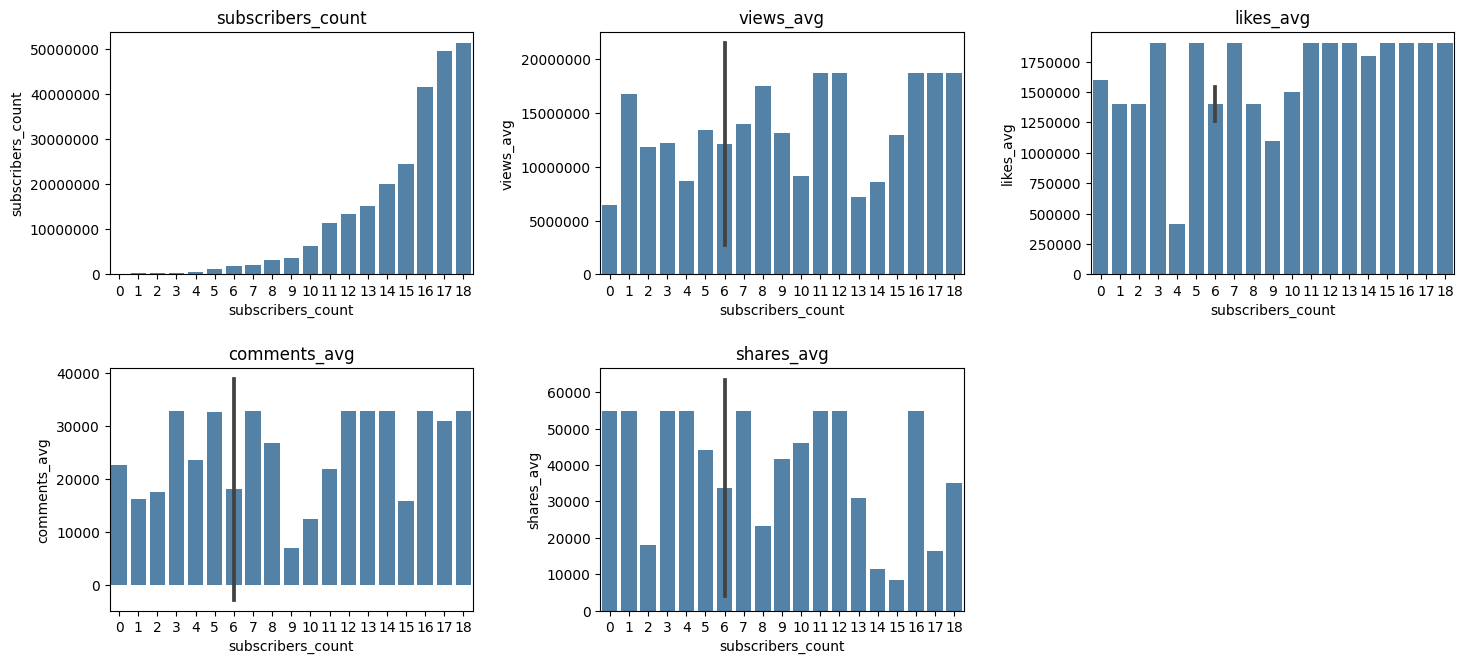

In [35]:
# Filter rank column
top_20_subscribers = tiktok_wins_df['subscribers_count'].head(20)

plt.figure(figsize=(15, 7)) 
for i, col in enumerate(['subscribers_count', 'views_avg', 'likes_avg', 'comments_avg', 'shares_avg'], start=1):
  plt.subplot(2, 3, i)
  ax = sns.barplot(data=tiktok_wins_df, x=top_20_subscribers, y=col, errorbar='sd', color='steelblue')
  plt.title(f'{col}')
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.tight_layout(pad=2.0)
plt.show()

Top ranked tiktok influencers have have a high numbers of views, likes, comments, and shares, while the number of subscribers vary. 

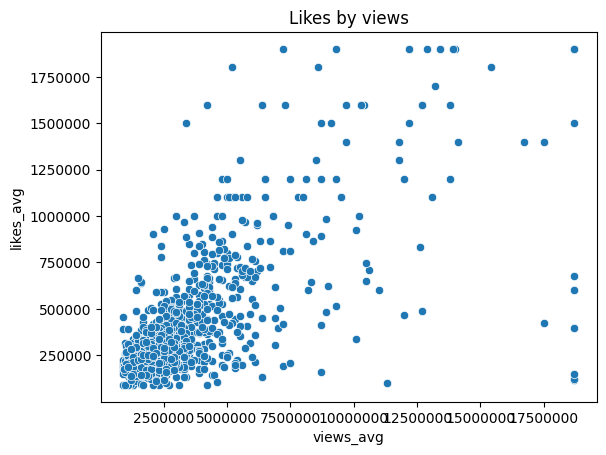

In [36]:
ax = sns.scatterplot(data=tiktok_wins_df, x='views_avg', y='likes_avg')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#specify positions of ticks on x-axis and y-axis
# plt.xticks([2000000, 3000000, 4000000, 5000000, 6000000, 7000000])
# plt.yticks([200000, 300000, 400000, 500000, 600000, 700000, 800000])

plt.title('Likes by views')
plt.show()

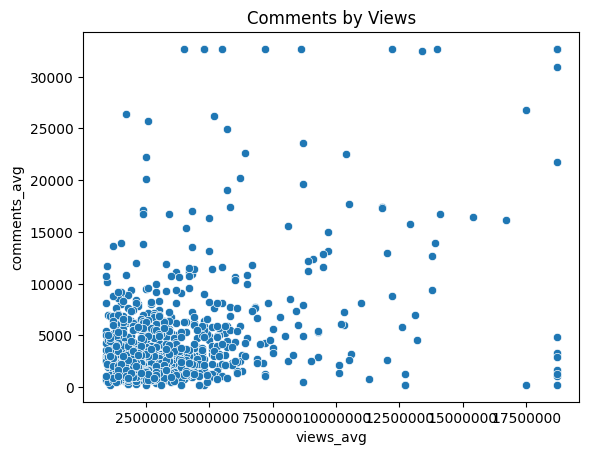

In [37]:
ax = sns.scatterplot(data=tiktok_wins_df, x='views_avg', y='comments_avg')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# #specify positions of ticks on x-axis and y-axis
# plt.xticks([2000000, 3000000, 4000000, 5000000, 6000000, 7000000])
# plt.yticks([2000, 4000, 6000, 8000])

plt.title('Comments by Views')
plt.show()

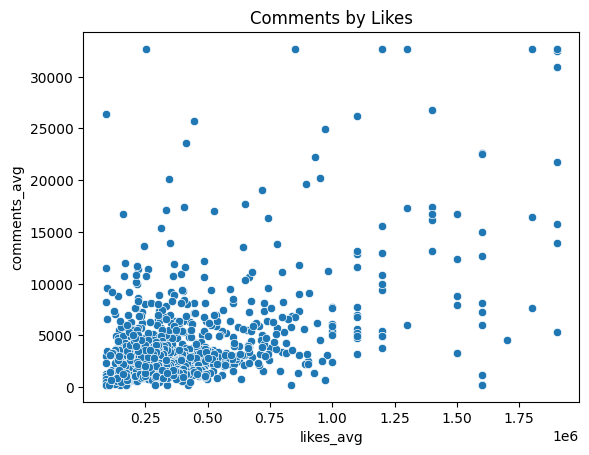

In [38]:
sns.scatterplot(data=tiktok_wins_df, x='likes_avg', y='comments_avg')
plt.title('Comments by Likes')
plt.show()

There definitely seems to be a trend in all in all plots:
    
    Plot 1: The lower the views, the higher the rank.
    plot 2: The lower the likes, the higher the rank.
    Plot 3: The lower the views, the lowers the comments
    Plot 4: The lower the views, the lower the likes 
    Plot 5: The lower the the comments, the lower the likes
    

## Data Modeling

*Data modeling* organizes everything internally and it treats and proccesses the data. The purpose of modeling is to produce high quality, consistent, structured data for achieving consistent resutls. *Predictive modeling* is used to determine a certain output using historical data.

In order to train this Python model, the values of the target output need to be 0 & 1. So I will replace the rank with 1 if their rank is in the top 20, otherwise replace with  0.

In [39]:
# Replace values in rank with 0 and 1
for i in range(len(tiktok_wins_df)):
  if i <= 201:
    res = tiktok_wins_df.loc[tiktok_wins_df['rank'] <= 200, 'rank'] = 1
  elif i > 201:
    tiktok_wins_df.loc[tiktok_wins_df['rank'] > 200, 'rank'] = 0

### Feature Selection

In [40]:
# Create copy of tiktok_wins_df
wins_df_slice = tiktok_wins_df.copy()

In [41]:
# Define X and Y
X = wins_df_slice.iloc[:, 3:]
Y = wins_df_slice.iloc[:,0]

In [42]:
# Select top 3 features
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(X, Y)

In [43]:
# Create data frames for features and score of each feature
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [44]:
# Combine features and their corresponding scores in one dataframe
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['features', 'score']
features_scores.sort_values(by = 'score')

,features,score
3,comments_avg,1.572931e+06
4,shares_avg,2.550139e+06
2,likes_avg,1.324311e+08
0,subscribers_count,3.013095e+08
1,views_avg,9.052592e+08


Here we notice that the top 3 features that are most related to the target output are:

1. Views
2. Likes
3. Shares

### Build the Model

In [45]:
# Split dataset into X and Y
X = wins_df_slice[['views_avg', 'subscribers_count', 'shares_avg']]
Y = wins_df_slice[['rank']]

# # Split dataset into X and Y
# X = wins_df_slice[['views_avg', 'likes_avg', 'shares_avg']]
# Y = wins_df_slice[['rank']]

In [46]:
# Split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [47]:
# Create a logistic regression body
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [48]:
# Predict the rank of an individual using the logistic regression body
y_pred = logreg.predict(x_test)
print(x_test) #test dataset
print(y_pred) #predicted values

     views_avg  subscribers_count  shares_avg
249  2400000.0          2300000.0     10700.0
353  3600000.0          2200000.0      3400.0
537  3400000.0         21400000.0      1400.0
424   959700.0           866800.0     15600.0
564  1100000.0           467600.0     14000.0
..         ...                ...         ...
88   6700000.0         19300000.0      6000.0
500  3500000.0         13100000.0       567.0
620  1500000.0          2900000.0      2900.0
462  1500000.0            32600.0      6900.0
127  6200000.0         51300000.0      3000.0

[400 rows x 3 columns]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 

As a final step, I'll evaluate how well the Python model performed predictive analytics by running a classification report and a ROC curve.

### Classification Report

A classification report is a performace evaluation report that is used to evaluate the performance of machine learning models by the following 5 criteria:

1. **Accuracy** is a score used to evaluate the model’s performance. The higher it is, the better.

2. **Recall** measures the model’s ability to correctly predict the true positive values.

3. **Precision** is the ratio of true positives to the sum of both true and false positives.

4. **F-score** combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.

5. **Support** is the number of actual occurrences of each class in the dataset.

In [49]:
# Call scores 
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("CL Report:",metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6925
Recall:  0.6925
Precision: 0.6986005075789181
CL Report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80       311
           1       0.32      0.34      0.33        89

    accuracy                           0.69       400
   macro avg       0.56      0.57      0.56       400
weighted avg       0.70      0.69      0.70       400



Models performace numbers:

- Accuracy: 98.7%

- Recall: 98.7%

- Percision: 98.7%

Can safely conclude that this model predicted the likelihood a someone ranked in the top 20.

### ROC Curve

The receiver operating characteristic (ROC) curve is used to display the sensitivity (or TPR) and specificity (1 - FPR). Classifiers that give curves closer to the top-left corner indicate a better performace. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to 45-degree diagonal of the ROC space, the less accurate the test. 

From the ROC curve, we can calculate the area under the curve (AUC), whose value ranges from 0 to 1. The closer to 1, the better it is for our predictive modeling. It is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance

(TP + TN)/(TP + TN + FN + FP) would favor classifiers that always predict a negative outcome for rare events.

TPR stands for *true positive rate*

FPR stands for *false positive rate*

In [50]:
# Define the metrics
y_pred_proba = logreg.predict_proba(x_test)[::,1]

In [51]:
# Calculate true and false positive rate
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [52]:
# Calculate the AUC to see the models performance
auc = metrics.roc_auc_score(y_test, y_pred_proba)

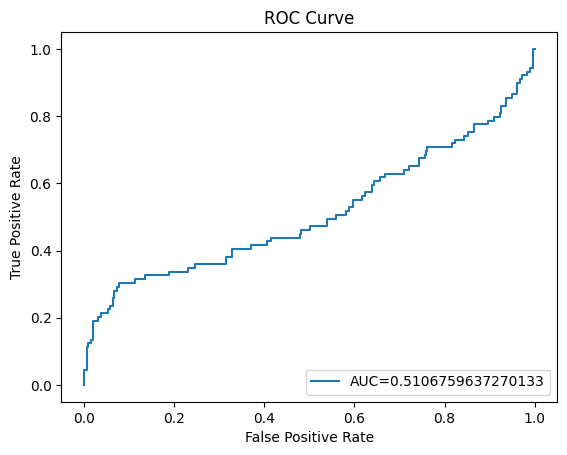

In [53]:
# Plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)